In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [0]:
class Support_Vector_Machine:
  
  def __init__(self, visualization=True):
    self.visualization = visualization
    self.colors = {1:'r',-1:'b'}
    if self.visualization:
      self.fig = plt.figure()
      self.ax = self.fig.add_subplot(1,1,1)
  
  def fit(self, data):
    self.data =data
    # { ||w||: [w,b] }
    opt_dict={}
    
    #Think about every sign of W vector besides it's norm value
    #Inner product of Transform and W will take care of that.
    transforms = [[1,1], [1,-1], [-1,1], [-1,-1]]
    
    #Find Min and max data values
    all_data = []
    for yi in self.data:
      for featureset in self.data[yi]:
        for features in featureset:
          all_data.append(features)
    self.max_feature_values = max(all_data)
    self.min_feature_values = min(all_data)
    
    #Optimization
    step_sizes = [self.max_feature_values * 0.1, 
                  self.max_feature_values * 0.01,
                 self.max_feature_values * 0.001]
    
    b_range_multiple = 5 #For range of b
    b_multiple = 5 # Actual multiplied by b
    latest_optimum = self.max_feature_values * 10
    
    for step in step_sizes:
      w = np.array([latest_optimum, latest_optimum])
      optimized =False
      while not optimized:
        for b in np.arange(-1 * (self.max_feature_values * b_range_multiple),
                           self.max_feature_values * b_range_multiple,
                          step * b_multiple):
          for transformation in transforms:
            w_t = w * transformation
            found_option = True
            for i in self.data:
              #check yi(xi.w + b) >=1
              for xi in self.data[i]:
                yi= i
                if not yi *(np.dot(w_t, xi) + b) >=1:
                  found_option = False
                  
            if found_option:
              opt_dict[np.linalg.norm(w_t)] = [w_t, b]
        
        if w[0] < 0 :
          optimized = True
          print('optimized.')
        else:
          w=w - step
      norms = sorted([n for n in opt_dict])
      opt_choice =opt_dict[norms[0]]
      
      self.w = opt_choice[0]
      self.b = opt_choice[1]
      latest_optimum = opt_choice[0][0] + step*2
      
                  
  
  def Predict(self, features):
    #sign (x.w + b)
    classification =np.sign(np.dot(np.array(features), self.w) + self.b)
    if classification !=0 and self.visualization:
      self.ax.scatter(features[0], features[1], s=200, marker ='*', c=self.colors[classification])
    return classification
  
  def visualize(self):
    [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    
    #hyperplan = x.w +b
    #v= x.w + b
    def hyperplan(x,w,b,v):
      return (-w[0]*x -b +v) / w[1]
    
    datarange = (self.min_feature_values * 0.9, self.max_feature_values * 1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]
    
    #Positive support vector hyperplan
    psv1 = hyperplan(hyp_x_min, self.w, self.b, 1)
    psv2 = hyperplan(hyp_x_max, self.w, self.b, 1)
    self.ax.plot([hyp_x_min, hyp_x_max],[psv1, psv2])
    
    #Negative support vector hyperplan
    nsv1 = hyperplan(hyp_x_min, self.w, self.b, -1)
    nsv2 = hyperplan(hyp_x_max, self.w, self.b, -1)
    self.ax.plot([hyp_x_min, hyp_x_max],[nsv1, nsv2])
    
    #Decision Boundary
    db1 = hyperplan(hyp_x_min, self.w, self.b, 0)
    db2 = hyperplan(hyp_x_max, self.w, self.b, 0)
    self.ax.plot([hyp_x_min, hyp_x_max],[db1, db2])
    
    plt.show()
   

In [0]:
data_dict= {-1: np.array([[1,7],[2,8],[3,8]]), 1:np.array([[5,1],
                                                          [6,-1], [7,3]])}

optimized.
optimized.
optimized.


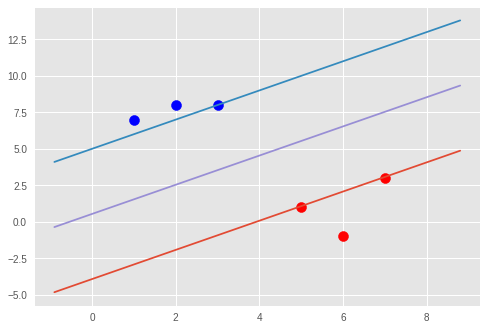

In [35]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize()